In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Replace 'your_file.xlsx' with the actual file path
file_path = 'data/kpmg.xlsx'

# Use the ExcelFile class to read the Excel file
xls = pd.ExcelFile(file_path)

# List the sheet names in the Excel file
sheet_names = xls.sheet_names

# Create DataFrames for each sheet
dataframes = {}  # Dictionary to store DataFrames

for sheet_name in sheet_names:
    dataframes[sheet_name] = pd.read_excel(xls, sheet_name)

# Now you have separate DataFrames for each sheet
# access the dataframes using their sheet names
transaction_data = dataframes['Transactions']
demographic_data = dataframes['CustomerDemographic']
customer_data = dataframes['CustomerAddress']

In [2]:
# Reading the first five rows of the customer dataset
customer_data.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [3]:
# Reading the first five rows of the demographic dataset
demographic_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
# Get unique values in the 'gender' column and count the occurrences of each unique value
gender_counts = demographic_data['gender'].unique()
counts = demographic_data['gender'].value_counts()

# Print the unique values and their respective counts
print("Unique Gender Values:")
print(gender_counts)
print("\nGender Value Counts:")
print(counts)

Unique Gender Values:
['F' 'Male' 'Female' 'U' 'Femal' 'M']

Gender Value Counts:
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64


In [5]:
# Create a mapping dictionary to standardize gender values
gender_mapping = {
    'F': 'Female',
    'Male': 'Male',
    'Female': 'Female',
    'U': 'Unspecified',
    'Femal': 'Female',
    'M': 'Male'
}

# Use the mapping dictionary to replace gender values
demographic_data['gender'] = demographic_data['gender'].replace(gender_mapping)

# Check the corrected unique values and their counts
gender_counts_corrected = demographic_data['gender'].unique()
counts_corrected = demographic_data['gender'].value_counts()

# Print the corrected unique values and their counts
print("Unique Gender Values (Corrected):")
print(gender_counts_corrected)
print("\nGender Value Counts (Corrected):")
print(counts_corrected)

Unique Gender Values (Corrected):
['Female' 'Male' 'Unspecified']

Gender Value Counts (Corrected):
Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64


In [6]:
# Reading the first five rows of the transaction dataset
transaction_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


## Accuracy and Completeness Assessment

***Check for data accuracy issues, such as missing values in critical columns.***

**customer Data**

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [8]:
# Accuracy Assessment
import numpy as np
# Check for missing values in key columns
missing_values =customer_data.isnull().sum()

# Calculate the percentage of missing values in each column
total_records = customer_data.shape[0]
percentage_missing = (missing_values / total_records) * 100

# Print results
print(np.char.center('Missing Values in Transaction Dataset', 60, '*'))
print(missing_values)
print("\nPercentage of Missing Values:")
print(percentage_missing)

***********Missing Values in Transaction Dataset************
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

Percentage of Missing Values:
customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64


In [9]:
customer_data['property_valuation'].describe()

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64

In [10]:
duplicate_rows = customer_data[customer_data.duplicated()]
# Print duplicate rows, if any
print("Duplicate Rows in Transaction Dataset:")
print(duplicate_rows)


Duplicate Rows in Transaction Dataset:
Empty DataFrame
Columns: [customer_id, address, postcode, state, country, property_valuation]
Index: []


The `country` column in the 'customer_data' dataset contains the value "Australia" for all its entries. Since this column doesn't provide any additional information due to its uniformity (as it's the same for all records), we can safely remove it without losing any valuable data. This can help make your dataset more concise and easier to work with.

In [11]:
customer_data.drop('country', axis=1, inplace=True)

**Demographic_data**

In [12]:
demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [13]:
# Check for missing values in key columns
missing_values = demographic_data.isnull().sum()

# Calculate the percentage of missing values in each column
total_records = demographic_data.shape[0]
percentage_missing = (missing_values / total_records) * 100

# Print results
print(np.char.center('Missing Values in Demographic Dataset', 60, '*'))
print(missing_values)
print("\nPercentage of Missing Values:")
print(percentage_missing)

***********Missing Values in Demographic Dataset************
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

Percentage of Missing Values:
customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_c

`last_name:` This column has a relatively low percentage of missing values, about 3.1%. It's reasonable to fill the missing values with the mode, which means replacing them with the most frequently occurring last name in the dataset. This approach helps maintain data integrity.

`DOB (Date of Birth):` The 'DOB' column has around 2.2% missing values. Given the importance of this information, it's advisable to fill the missing values with the mode, which is the most common date of birth in the dataset. This way, you can preserve the completeness of the data.

`job_title:` The 'job_title' column has a higher percentage of missing values, approximately 12.6%. In this case, filling the missing values with the mode is a practical solution. It ensures that the most common job titles are used to complete the dataset, even though it may not be ideal for all cases.

`job_industry_category:` With about 16.4% missing values, the 'job_industry_category' column requires filling. Again, using the mode to replace missing values is a reasonable choice. This method ensures that the most prevalent industry categories are used for the missing entries.

`default:` The 'default' column has a relatively high percentage of missing values, around 7.6%. Filling these missing values with the mode is a suitable approach, making use of the most common default status. However, be aware that this method might not capture the complexity of individual default preferences.

`Tenure:` The 'tenure' column has approximately 2.2% missing values. Filling these missing values with the mean of the 'tenure' values is a practical solution. Using the mean allows you to maintain data continuity and helps provide an estimate for missing values based on the existing data.

In [14]:
# Fill missing values with mode for categorical columns
demographic_data['last_name'] = demographic_data['last_name'].fillna(demographic_data['last_name'].mode()[0])
demographic_data['DOB'] = demographic_data['DOB'].fillna(demographic_data['DOB'].mode()[0])
demographic_data['job_title'] = demographic_data['job_title'].fillna(demographic_data['job_title'].mode()[0])
demographic_data['job_industry_category'] = demographic_data['job_industry_category'].fillna(demographic_data['job_industry_category'].mode()[0])
demographic_data['default'] = demographic_data['default'].fillna(demographic_data['default'].mode()[0])

# Fill missing values in 'tenure' column with the mean
demographic_data['tenure'] = demographic_data['tenure'].fillna(demographic_data['tenure'].mean())

In [15]:
# Convert columns to the desired data types
demographic_data['past_3_years_bike_related_purchases'] = pd.to_numeric(demographic_data['past_3_years_bike_related_purchases'])
demographic_data['tenure'] = pd.to_numeric(demographic_data['tenure'])
demographic_data['DOB'] = pd.to_datetime(demographic_data['DOB'])

In [16]:
# Check for duplicates in the dataset
duplicates = demographic_data[demographic_data.duplicated()]

# Print the duplicated rows, if any
if not duplicates.empty:
    print("Duplicated Rows:")
    print(duplicates)
else:
    print("No duplicates found in the dataset.")

No duplicates found in the dataset.


In [17]:
# Collecting the categorical columns into a list
cat_col = demographic_data.select_dtypes(include=['object']).columns.tolist()
cat_col

['first_name',
 'last_name',
 'gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'default',
 'owns_car']

In [18]:
for col in cat_col:
    print(f"{col}:")
    print(demographic_data[col].unique())
    print("*******")

first_name:
['Laraine' 'Eli' 'Arlin' ... 'Stephie' 'Rusty' 'Sarene']
*******
last_name:
['Medendorp' 'Bockman' 'Dearle' ... 'Halgarth' 'Woolley' 'Oldland']
*******
gender:
['Female' 'Male' 'Unspecified']
*******
job_title:
['Executive Secretary' 'Administrative Officer' 'Recruiting Manager'
 'Business Systems Development Analyst' 'Senior Editor' 'Media Manager I'
 'Senior Quality Engineer' 'Nuclear Power Engineer' 'Developer I'
 'Account Executive' 'Junior Executive' 'Media Manager IV'
 'Sales Associate' 'Professor' 'Geological Engineer' 'Project Manager'
 'Safety Technician I' 'Research Assistant I' 'Accounting Assistant III'
 'Editor' 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Control' 'Social Worker' 'Senior Cost Accountant'
 'Assistant Media Planner' 'Payment Adjustment Coordinator' 'Food Chemist'
 'Accountant III' 'Director of Sales' 'Senior Financial Analyst'
 'Registered Nurse' 

In [19]:
demographic_data.drop('default', axis=1, inplace=True)


In [20]:
demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  4000 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

To create a new 'Age' feature, we will convert the 'DOB' (Date of Birth) column into an `Age` column. Once this transformation is complete, we will drop the 'DOB' column from the dataset. 
This process involves replacing the date of birth values with the corresponding ages, and after successfully creating the new 'Age' feature, we remove the original 'DOB' column to keep our dataset more organized and concise

In [21]:
import datetime as dt

def from_dob_to_age(born):
    # Get today's date
    today = dt.date.today()
    
    # Calculate the age by subtracting the birth year
    age = today.year - born.year
    
    # Adjust the age if the birthdate hasn't occurred in the current year
    if (today.month, today.day) < (born.month, born.day):
        age -= 1
    
    return age

In [22]:
#applying the function on the DOB column
demographic_data['Age'] = demographic_data['DOB'].apply(lambda x: from_dob_to_age(x))

In [23]:
demographic_data.drop('DOB',axis=1,inplace=True)

In [24]:
# Print the information of our dataset
demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            4000 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   job_title                            4000 non-null   object 
 6   job_industry_category                4000 non-null   object 
 7   wealth_segment                       4000 non-null   object 
 8   deceased_indicator                   4000 non-null   object 
 9   owns_car                             4000 non-null   object 
 10  tenure                               4000 non-null   float64
 11  Age                           

In [25]:
# print the head of the dataset
demographic_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
3,4,Talbot,Pristnor,Male,33,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0,62
4,5,Sheila-kathryn,Calton,Female,56,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8.0,46


**Transaction Data**

In [26]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [27]:
# Check for missing values in key columns
missing_values = transaction_data.isnull().sum()

# Calculate the percentage of missing values in each column
total_records = transaction_data.shape[0]
percentage_missing = (missing_values / total_records) * 100

# Print results
print(np.char.center('Missing Values in Demographic Dataset', 60, '*'))
print(missing_values)
print("\nPercentage of Missing Values:")
print(percentage_missing)

***********Missing Values in Demographic Dataset************
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

Percentage of Missing Values:
transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64


In [28]:
# filling the online order column with the mode value 
transaction_data['online_order'] = transaction_data['online_order'].fillna(transaction_data['online_order'].mode()[0])

`Online Order:` Since 'online_order' has only 1.8% missing values, it's a small proportion of the data. We can safely fill these missing values with the mode, which is the most frequent data point. Filling with the mode ensures that you don't lose important data while addressing the missing values.

`Brand`, `Product Line`, `Product Class`, `Product Size`, `Standard Cost`, and `Product First Sold Date`: These columns all have a 1% rate of missing values, and they seem to follow the same missing data pattern. In this case, it is reasonable to remove the rows containing these null values. The missing data accounts for only a small fraction of the dataset (1%), and removing them won't significantly impact your analysis or modeling process. This approach helps maintain data quality and consistency in the remaining dataset.

In [29]:
# Removing other data rows with nul values
transaction_data.dropna(axis=0,inplace=True)

In [30]:
# Check for missing values in key columns
missing_values = transaction_data.isnull().sum()

# Calculate the percentage of missing values in each column
total_records = transaction_data.shape[0]
percentage_missing = (missing_values / total_records) * 100

# Print results
print(np.char.center('Missing Values in Demographic Dataset', 60, '*'))
print(missing_values)
print("\nPercentage of Missing Values:")
print(percentage_missing)

***********Missing Values in Demographic Dataset************
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

Percentage of Missing Values:
transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64


**Converting datatypes**

In [31]:
# Convert 'list_price' column to a numeric data type
transaction_data['list_price'] = pd.to_numeric(transaction_data['list_price'])

# Convert 'standard_cost' column to a numeric data type
transaction_data['standard_cost'] = pd.to_numeric(transaction_data['standard_cost'])

# Convert 'transaction_date' column to a datetime data type
transaction_data['transaction_date'] = pd.to_datetime(transaction_data['transaction_date'])

In [32]:
# Print out the dataset information
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [33]:
# Check for duplicate rows in the transaction_data dataset
duplicates = transaction_data[transaction_data.duplicated()]

# Count the number of duplicate rows
num_duplicates = len(duplicates)

# Display the duplicate rows and the total count
if num_duplicates > 0:
    print(f"Number of duplicate rows: {num_duplicates}")
    print("Duplicate rows:")
    print(duplicates)
else:
    print("No duplicate rows found in the transaction_data dataset.")

No duplicate rows found in the transaction_data dataset.


To ensure the consistency and quality of the categorical data in the dataset, we will create a list that includes all the categorical columns. Categorical columns are those that contain non-numeric data, such as labels, categories, or text values. This list will help us focus on examining and potentially cleaning these specific columns to maintain data integrity and accuracy during our analysis.

In [34]:
# Collect the categorical columns into a list
cat_col = transaction_data.select_dtypes(include='object').columns.tolist()
cat_col

['order_status', 'brand', 'product_line', 'product_class', 'product_size']

In [35]:
# Iterate through each categorical column in the dataset
for col in cat_col:
    # Print the column name
    print(f"Column: {col}")
    
    # Check for unique values in the column
    unique_values = transaction_data[col].unique()
    
    # Print the unique values
    print("Unique Values:")
    print(unique_values)
    
    # Check for duplicate values in the column
    is_duplicate = transaction_data[col].duplicated().any()
    
    # Print the duplicate status
    if is_duplicate:
        print("Duplicate values found in this column.")
    else:
        print("No duplicate values found in this column.")
    
    # Add a separator for clarity
    print("\n*******\n")

Column: order_status
Unique Values:
['Approved' 'Cancelled']
Duplicate values found in this column.

*******

Column: brand
Unique Values:
['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B']
Duplicate values found in this column.

*******

Column: product_line
Unique Values:
['Standard' 'Road' 'Mountain' 'Touring']
Duplicate values found in this column.

*******

Column: product_class
Unique Values:
['medium' 'low' 'high']
Duplicate values found in this column.

*******

Column: product_size
Unique Values:
['medium' 'large' 'small']
Duplicate values found in this column.

*******



It appears that the `product_first_sold_date` column may have an incorrect date format that needs to be corrected. To address this issue, we'll convert the data in this column to the correct datetime format.

In [36]:
# Convert 'product_first_sold_date' column to object (string) data type
transaction_data['product_first_sold_date'] = transaction_data['product_first_sold_date'].astype(str)

In [37]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [38]:
# Convert 'product_first_sold_date' column to datetime with year, month, and date
transaction_data['product_first_sold_date'] = pd.to_datetime(transaction_data['product_first_sold_date'], unit='s').dt.strftime('%Y-%m-%d')

In [39]:

transaction_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01


In [40]:

# Create new variables based on 'transaction_date'
transaction_data['Transaction_year'] = transaction_data['transaction_date'].dt.year
transaction_data['Transaction_month'] = transaction_data['transaction_date'].dt.month_name()
transaction_data['Transaction_day'] = transaction_data['transaction_date'].dt.day
transaction_data['day_of_the_week'] = transaction_data['transaction_date'].dt.day_name()

# Convert the 'Transaction_year' and 'Transaction_day' columns to string data type
transaction_data['Transaction_year'] = transaction_data['Transaction_year'].astype(str)
transaction_data['Transaction_day'] = transaction_data['Transaction_day'].astype(str)

# Display the first few rows of the updated dataset
transaction_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Transaction_year,Transaction_month,Transaction_day,day_of_the_week
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,2017,February,25,Saturday
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01,2017,May,21,Sunday
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01,2017,October,16,Monday
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01,2017,August,31,Thursday
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01,2017,October,1,Sunday


## Merging Datasets

Since the three datasets are interconnected, with the first one containing transaction information, the second one containing demographic data, and the third one containing customer addresses, we can establish relationships between them. We can use the 'customer_id' as a common key to link these datasets.

By performing an inner join, we combine these datasets based on the 'customer_id,' which acts as a primary key in the first dataset (transactions) and a foreign key in the second (demographics) and third (addresses) datasets. This process creates a unified dataset that contains transaction details along with corresponding demographic and address information for each customer. It allows us to analyze and draw insights from a comprehensive dataset that combines information from different sourc

In [41]:
# Joining the Transactions dataset with the Customer Demographics dataset using 'customer_id' as the common key.
# We perform an inner join to keep only the rows with matching customer IDs in both datasets.
transactions_demographics = transaction_data.merge(demographic_data, on='customer_id', how='inner')

# Display the first 5 rows of the merged dataset to inspect the result.
transactions_demographics.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Anthony,Male,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,O'Donnell,Female,89,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,O'Donnell,Female,89,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44


In [42]:
# Merging the Transactions and Customer Demographics dataset with the Addresses dataset into a final_dataset dataset (Customers, Transactions, Addresses).
# We use 'customer_id' as the common key for the merge and perform an inner join to retain rows with matching customer IDs in all three datasets.
final_data = transactions_demographics.merge(customer_data, on='customer_id', how='inner')

# The resulting final dataset now contains information about customers, their transactions, and their addresses.

In [43]:
# print the information of the dataset
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19773 entries, 0 to 19772
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19773 non-null  int64         
 1   product_id                           19773 non-null  int64         
 2   customer_id                          19773 non-null  int64         
 3   transaction_date                     19773 non-null  datetime64[ns]
 4   online_order                         19773 non-null  float64       
 5   order_status                         19773 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

## Saving the final_data as csv

In [44]:
# Define the file path where you want to save the final CTA dataset.
output_file_path = 'final_cta_data.csv'

# Save the CTA dataset to a CSV file.
final_data.to_csv(output_file_path, index=False)

# Display a message indicating that the dataset has been saved.
print(f"The final CTA dataset has been saved to '{output_file_path}'.")

The final CTA dataset has been saved to 'final_cta_data.csv'.


## Descriptive Statistics for Numerical Columns

In [45]:
# Basic statistics for 'list_price'
list_price_stats = final_data['list_price'].describe()

# Basic statistics for 'standard_cost'
standard_cost_stats = final_data['standard_cost'].describe()

# Basic statistics for 'Age'
age_stats = final_data['Age'].describe()

# Print the results
print("Descriptive Statistics for list_price:")
print(list_price_stats)
print("\nDescriptive Statistics for standard_cost:")
print(standard_cost_stats)
print("\nDescriptive Statistics for Age:")
print(age_stats)

Descriptive Statistics for list_price:
count    19773.000000
mean      1108.043581
std        582.845663
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

Descriptive Statistics for standard_cost:
count    19773.000000
mean       556.091050
std        405.966472
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

Descriptive Statistics for Age:
count    19773.000000
mean        45.711172
std         12.746119
min         21.000000
25%         36.000000
50%         45.000000
75%         55.000000
max        179.000000
Name: Age, dtype: float64


`list_price:`

The average (mean) list price for products is approximately $1,108.04, with a standard deviation of around $582.85.
The prices vary significantly, ranging from a minimum of $12.01 to a maximum of $2,091.47.
The 25th percentile (Q1) value is $575.27, and the median (Q2) price is $1,163.89, indicating that half of the products are priced below this value.
The 75th percentile (Q3) price is $1,635.30, showing that the majority of products are priced below this value.

`standard_cost:`

The mean standard cost for products is approximately $556.09, with a standard deviation of about $405.97.
The standard costs range from a minimum of $7.21 to a maximum of $1,759.85.
The 25th percentile (Q1) value is $215.14, and the median (Q2) standard cost is $507.58.
The 75th percentile (Q3) standard cost is $795.10, indicating that most products have a standard cost below this value.

`Age:`

The average age of customers is approximately 45.71 years, with a standard deviation of about 12.75 years.
Customer ages range from a minimum of 21 years to a maximum of 179 years.
The 25th percentile (Q1) age is 36 years, and the median (Q2) age is 45 years, meaning half of the customers are aged below 45.
The 75th percentile (Q3) age is 55 years, demonstrating that most customers are aged below 55.
These statistics help us understand the price distribution, variability, and customer age demographics within our dataset.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualize the numerical data distributions:

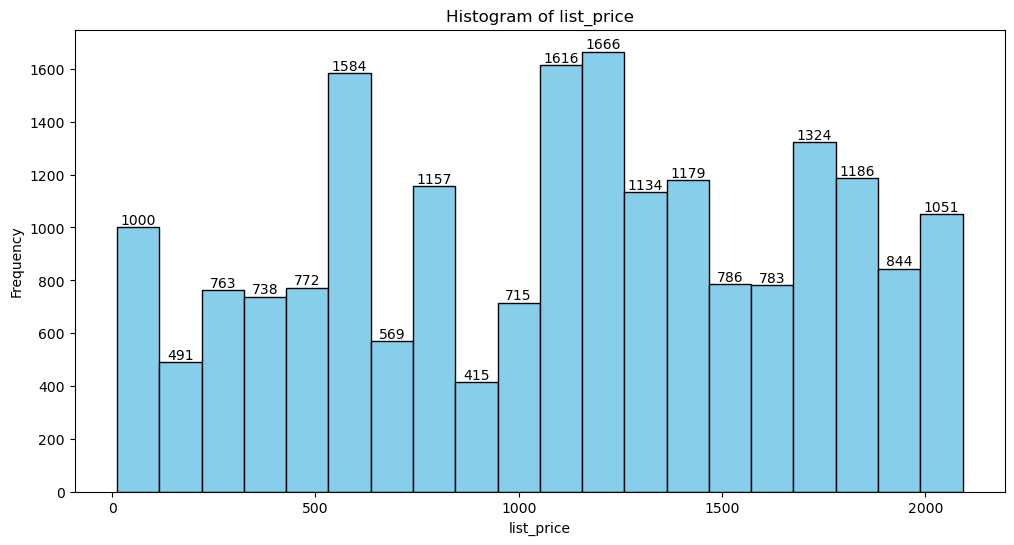

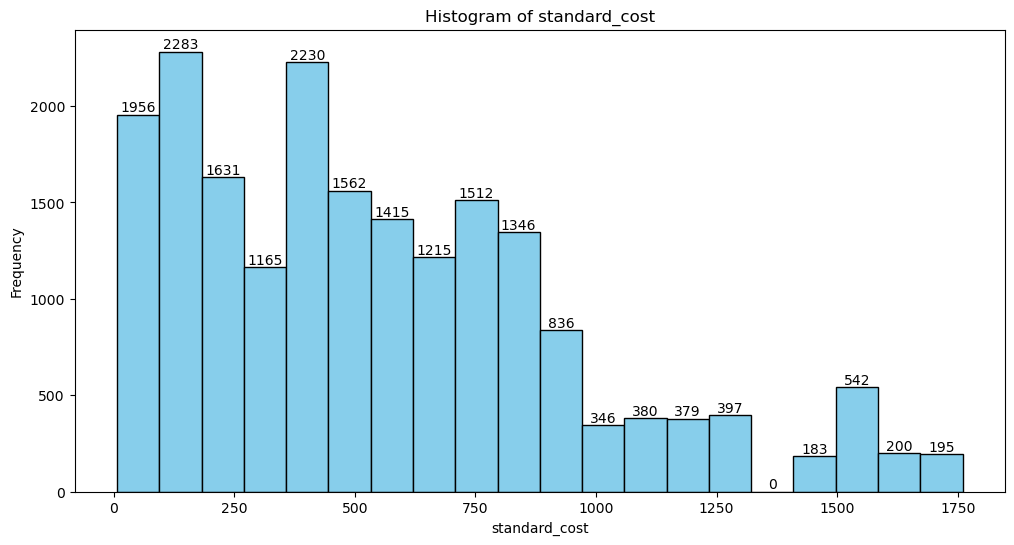

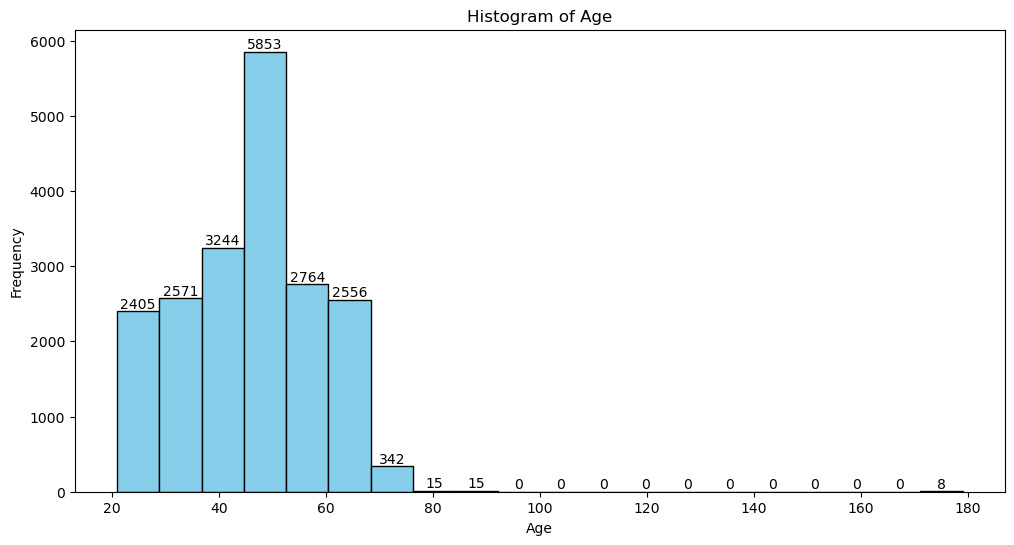

In [47]:
numerical_columns = ['list_price', 'standard_cost', 'Age']
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    n, bins, patches = plt.hist(final_data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    for i in range(len(patches)):
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), int(n[i]), ha='center', va='bottom')
    plt.show()

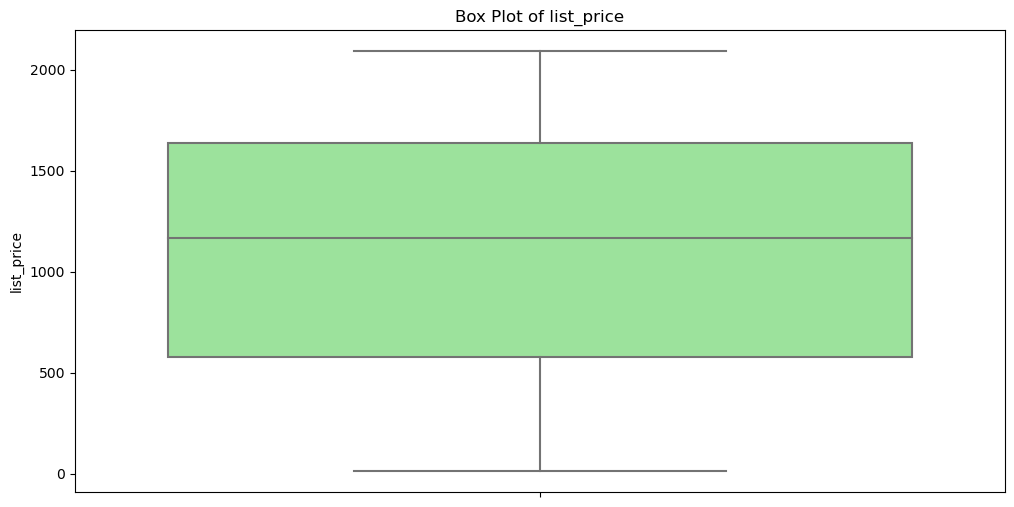

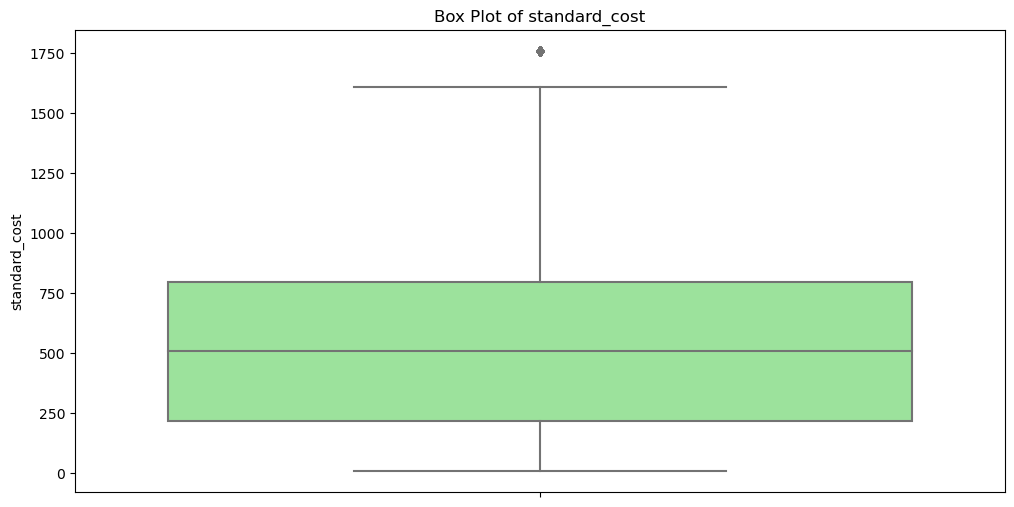

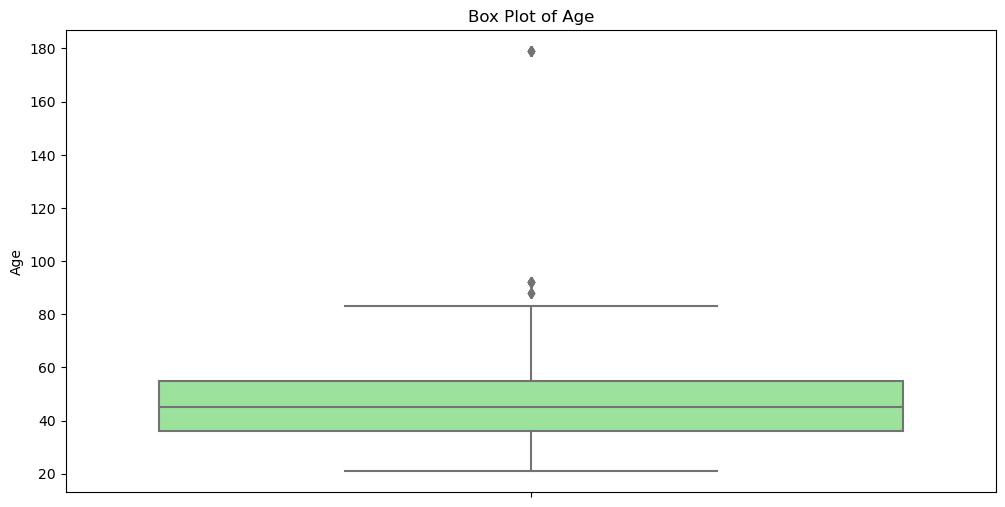

In [48]:
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=final_data, y=column, color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.show()

## Gender Distribution:

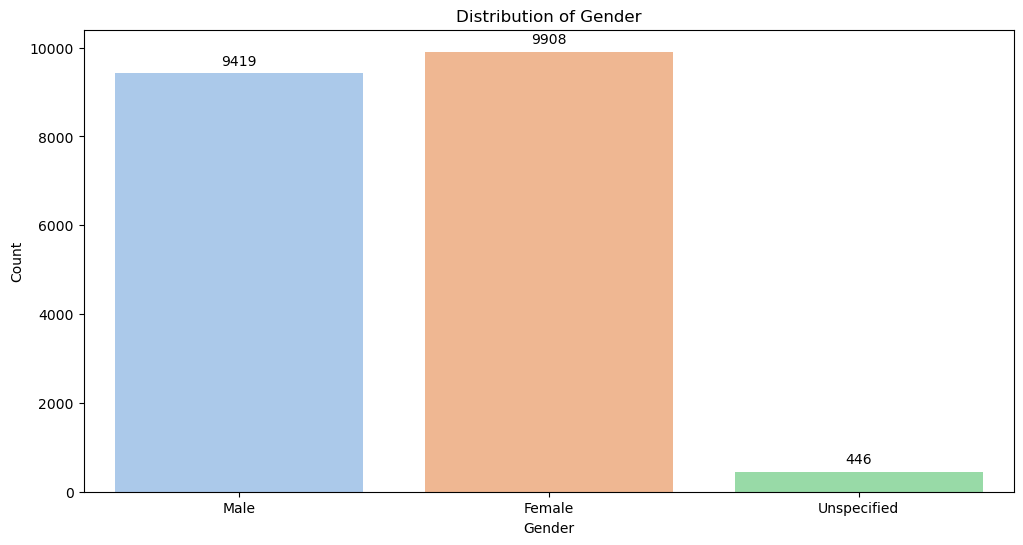

In [49]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=final_data, x='gender', palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.show()

### Time Series Analysis: 

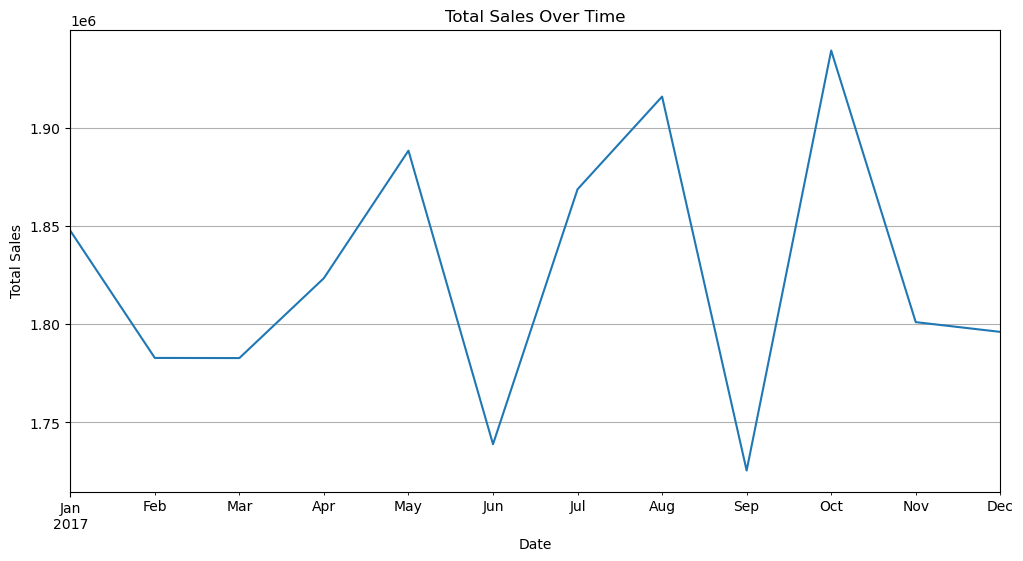

In [50]:


# Group transactions by month and calculate the total sales per month
monthly_sales = final_data.groupby(final_data['transaction_date'].dt.to_period('M'))['list_price'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### Distribution of Job Industry Category

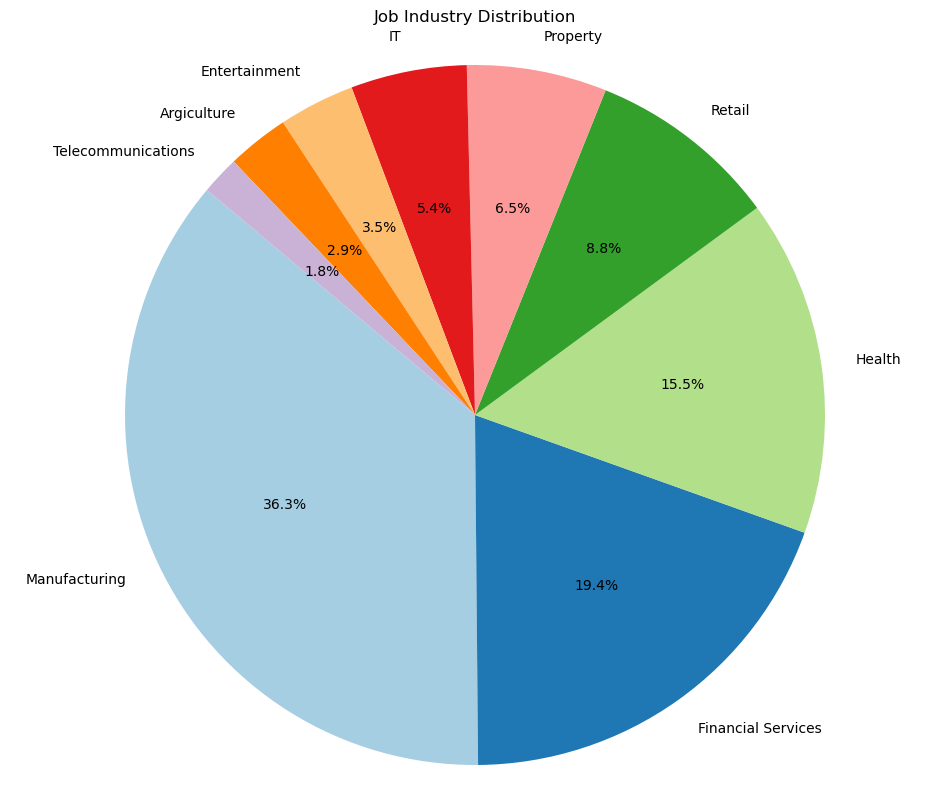

In [51]:
# 'final_data' with a 'job_industry_category' column
job_counts = final_data['job_industry_category'].value_counts()
labels = job_counts.index
sizes = job_counts.values

# Define a color palette
colors = plt.cm.Paired(range(len(labels)))

# Create the pie chart
plt.figure(figsize=(12, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add percentages and numbers to the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Job Industry Distribution')

plt.show()

### Customer Segmentation and Targeted Marketing Using RFM Analysis

In [52]:
# Calculate the Recency value
current_date = pd.to_datetime('2023-10-24')  # Use the current date
final_data['Recency'] = (current_date - final_data.groupby('customer_id')['transaction_date'].transform('max')).dt.days

In [53]:
# Calculate the Frequency value
frequency_data = final_data.groupby('customer_id')['transaction_id'].count().reset_index()
frequency_data.columns = ['customer_id', 'Frequency']
final_data = final_data.merge(frequency_data, on='customer_id', how='left')

In [54]:
# Calculate the Monetary value
monetary_data = final_data.groupby('customer_id')['list_price'].sum().reset_index()
monetary_data.columns = ['customer_id', 'Monetary']
final_data = final_data.merge(monetary_data, on='customer_id', how='left')

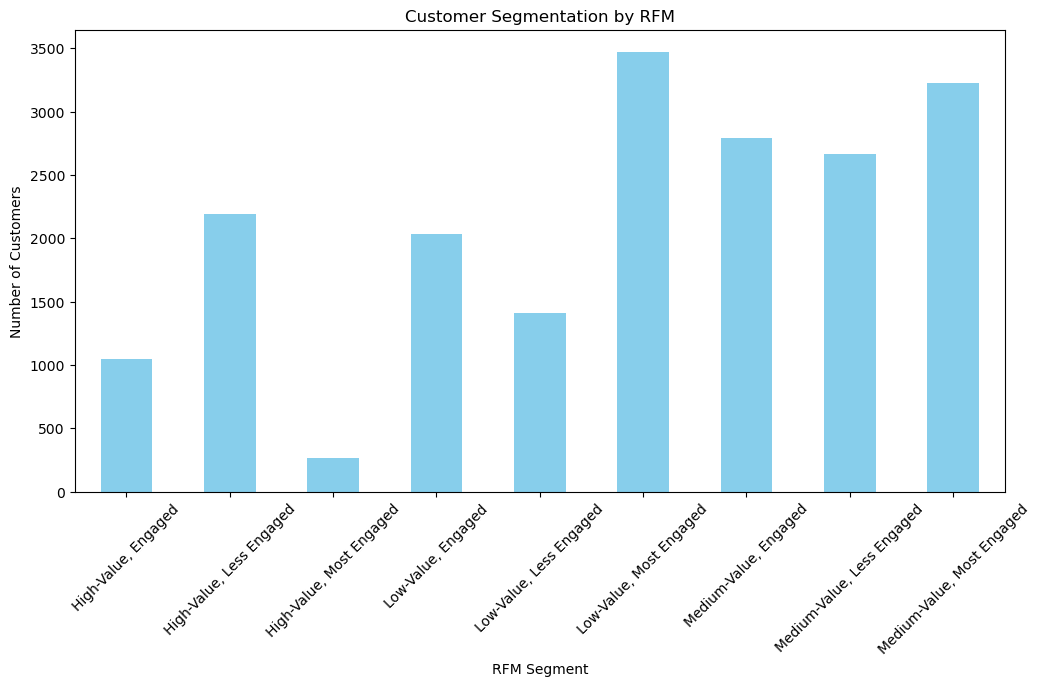

In [55]:
# RFM Scores
# Assign scores for Recency, Frequency, and Monetary
final_data['Recency_Score'] = pd.qcut(final_data['Recency'], q=4, labels=False, duplicates='drop')
final_data['Frequency_Score'] = pd.qcut(final_data['Frequency'], q=4, labels=False, duplicates='drop')
final_data['Monetary_Score'] = pd.qcut(final_data['Monetary'], q=4, labels=False, duplicates='drop')

# Calculate the RFM Score
final_data['RFM_Score'] = final_data['Recency_Score'] + final_data['Frequency_Score'] + final_data['Monetary_Score']

# Segment Customers
# Create segments based on RFM scores
segments = {
    9: 'High-Value, Most Engaged',
    8: 'High-Value, Engaged',
    7: 'High-Value, Less Engaged',
    6: 'Medium-Value, Most Engaged',
    5: 'Medium-Value, Engaged',
    4: 'Medium-Value, Less Engaged',
    3: 'Low-Value, Most Engaged',
    2: 'Low-Value, Engaged',
    1: 'Low-Value, Less Engaged',
}
final_data['RFM_Segment'] = final_data['RFM_Score'].map(segments)

# Visualize RFM Segments
segment_counts = final_data['RFM_Segment'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation by RFM')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

**Recency (R), Frequency (F), and Monetary (M) Values:**

**Recency:**This represents how recently each customer made a purchase. It calculates the number of days between the most recent transaction and the current date for each customer.

**Frequency:** This reflects how often each customer makes purchases. It counts the number of transactions for each customer.

**Monetary:** This measures the total amount of money spent by each customer, summing the 'list_price' from their transactions.

**RFM Scores:**

The code assigns scores for Recency, Frequency, and Monetary values. Higher scores indicate better engagement or higher values in these categories. The scores are assigned based on quartiles, with the top quartile receiving the highest score.

**RFM Segment:**

Based on the calculated RFM scores, customers are segmented into categories that represent their engagement and value. The segments are described using labels like "High-Value, Most Engaged" or "Low-Value, Less Engaged" based on the customer's RFM score.
**Visualization:**

The bar chart visually represents the customer segmentation by RFM. It shows the number of customers in each RFM segment, allowing you to see how customers are distributed across different categories.

**Targeting and Marketing:**

The code mentions the importance of developing targeted marketing strategies based on the RFM segments. This is the part where you would tailor our marketing efforts to different customer groups. For example, we might offer special promotions to the "Low-Value, Less Engaged" segment to encourage more purchases.

**Monitor and Refine:**

It's emphasized that after implementing marketing strategies, you should continuously monitor their performance. This means tracking how well each strategy is working and making adjustments as necessary. It's an essential step for optimizing your marketing efforts and improving customer engagement.

## Modelling

Identify high-value customers based on two key criteria: purchase frequency and profit contribution. The goal is to set threshold values for purchase frequency to determine which customers are considered high-value. To make this determination, the following observations are considered:

**Purchase Frequency Analysis:** When analyzing the purchase frequency, it is evident that a significant number of customers made a purchase approximately 5 times. This suggests that the range around 4, 5, and 6 purchases might be appropriate for setting threshold values.

**Profit Contribution:** In addition to purchase frequency, high-value customers should collectively generate more than 80% of the total profit for the business. This is an additional criterion to identify customers who significantly contribute to the company's profitability.

Overall, to define high-value customers, we will consider those who meet both the purchase frequency threshold (around 4, 5, or 6 purchases) and collectively contribute over 80% of the total profit. This approach ensures that high-value customers are not only frequent buyers but also substantial contributors to the company's financial success.

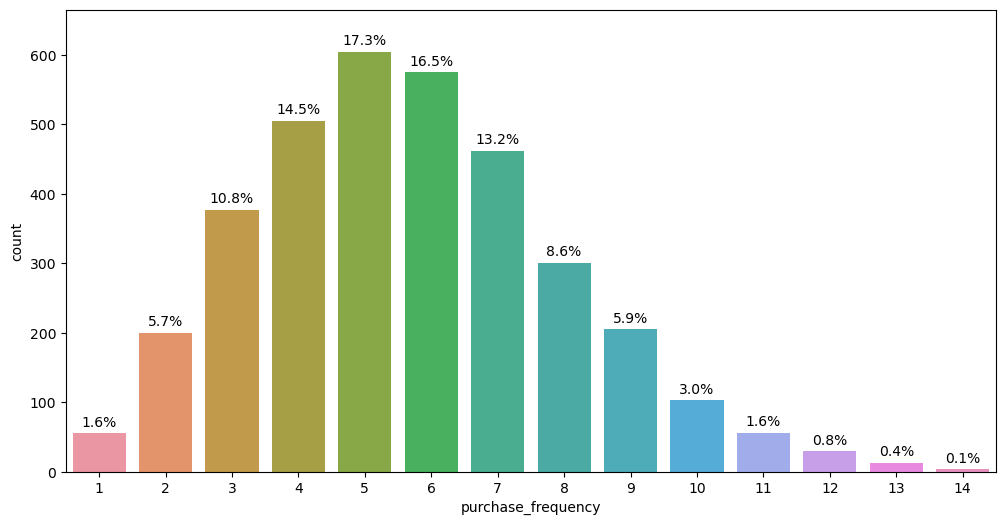

In [56]:
# Create a figure for the plot
fig = plt.figure(figsize=(12, 6))

# Group transactions by customer and count the number of purchases (purchase frequency)
purchase_frequency = final_data.groupby(['customer_id']).size().reset_index(name='purchase_frequency').sort_values(by=['purchase_frequency'])

# Create a countplot to visualize the purchase frequency
ax = sns.countplot(data=purchase_frequency, x='purchase_frequency')

# Add percentage labels to each bar in the countplot
for p in ax.patches:
    # Calculate the percentage of customers in each purchase frequency category
    percentage = '{:.1f}%'.format(p.get_height() / len(purchase_frequency) * 100)
    # Determine the x and y coordinates for annotation
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    # Annotate the bar with the percentage
    ax.annotate(text=percentage, xy=(x, y), ha='center')

# Adjust the y-axis margins for better visualization
ax.margins(y=0.1)

# Display the plot
plt.show()








We are then creating a fundamental and crucial feature called "profit." This feature is derived from the difference between the "list_price" and the "standard_cost" for each product or transaction.

In other words, "profit" represents the amount of money a business makes from selling a product after accounting for the cost of producing or acquiring that product. It's a key financial metric that indicates how much revenue remains as a surplus once the expenses associated with creating or purchasing the product are subtracted.

By calculating "profit" for each product or transaction, we can gain valuable insights into the financial performance and profitability of the business. This feature is essential for various analyses and decision-making processes, as it directly reflects the economic benefit a business derives from its operations.

In [57]:
# Create the "profit" feature by subtracting "standard_cost" from "list_price"
final_data['profit'] = final_data['list_price'] - final_data['standard_cost']

# Display the first few rows of the DataFrame with the new "profit" feature
final_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,property_valuation,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RFM_Segment,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,6,2199,3,1953.15,3,0,0,3,"Low-Value, Most Engaged",17.87
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,6,2199,3,1953.15,3,0,0,3,"Low-Value, Most Engaged",448.68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,6,2199,3,1953.15,3,0,0,3,"Low-Value, Most Engaged",179.44
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,5,2144,7,7351.70,1,2,2,5,"Medium-Value, Engaged",1702.55
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,5,2144,7,7351.70,1,2,2,5,"Medium-Value, Engaged",451.65


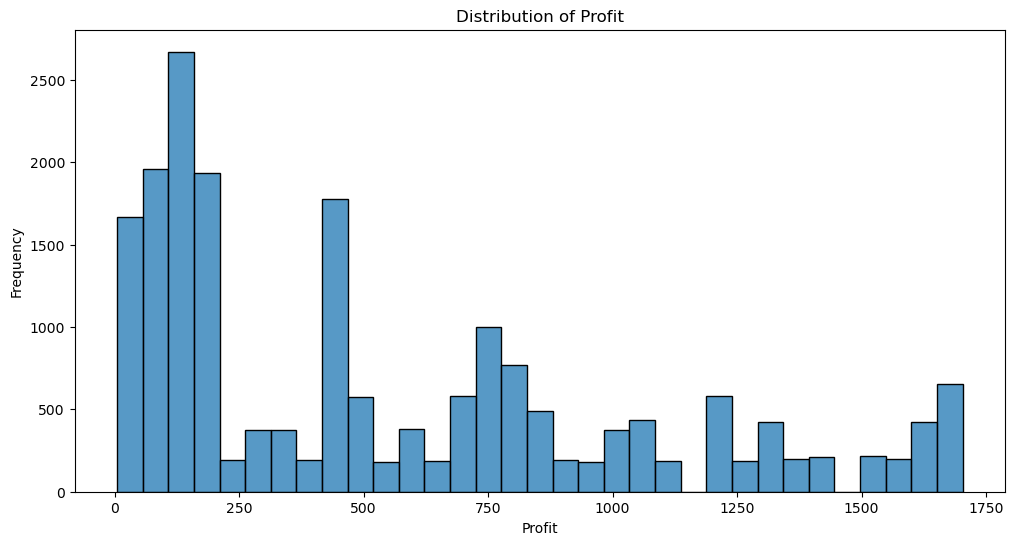

In [58]:
# Create a histogram of the "profit" feature using Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size
sns.histplot(data=final_data, x='profit')

# Add labels and title for clarity
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit')
plt.show()  # Display the plot

In [59]:
# Calculate total profit generated by each customer and sort by profit in descending order
total_profit_by_customer = final_data.groupby('customer_id')['profit'].sum().reset_index(name='total_profit').sort_values(by='total_profit', ascending=False).reset_index(drop=True)

# Display the DataFrame showing total profit by customer
total_profit_by_customer

,customer_id,total_profit
0,941,11668.95
1,2637,11222.65
2,1460,10787.60
3,1558,10640.30
4,729,10497.78
...,...,...
3484,922,41.13
3485,3272,41.13
3486,2274,35.74
3487,2532,17.87


In [60]:
# Calculate total profit generated by each customer
total_profit_by_cus = final_data.groupby('customer_id')['profit'].sum().reset_index(name='total_profit')

# Sort the results by total profit in descending order
total_profit_by_cus = total_profit_by_cus.sort_values(by='total_profit', ascending=False)

# Reset the index to improve the DataFrame's readability
total_profit_by_cus.reset_index(drop=True, inplace=True)

# Add the 'total_profit' column to the final_data DataFrame
final_data = final_data.merge(total_profit_by_cus, on='customer_id')



In [61]:
# Step 1: Calculate purchase frequency
purchase_frequency = final_data.groupby('customer_id')['transaction_id'].count().reset_index()
purchase_frequency.rename(columns={'transaction_id': 'purchase_frequency'}, inplace=True)

# Step 2: Merge the purchase frequency data back into the original dataset
final_data = final_data.merge(purchase_frequency, on='customer_id')

In [62]:
total_profit_by_customer.tail()

,customer_id,total_profit
3484,922,41.13
3485,3272,41.13
3486,2274,35.74
3487,2532,17.87
3488,3292,15.08


To determine the total profit generated by each customer, we've calculated the overall profit for each individual customer in our dataset. This analysis reveals that the lowest profit attributed to any single customer is a modest 15.08, whereas the highest profit earned by a customer reaches an impressive 11,668.95.

These figures illustrate the wide range of profitability among our customers, with some contributing only a small amount to the company's profit while others significantly bolster the financial success of our business. Understanding these variations can inform targeted marketing strategies and help us focus on high-profit customers for future growth and retention initiatives.







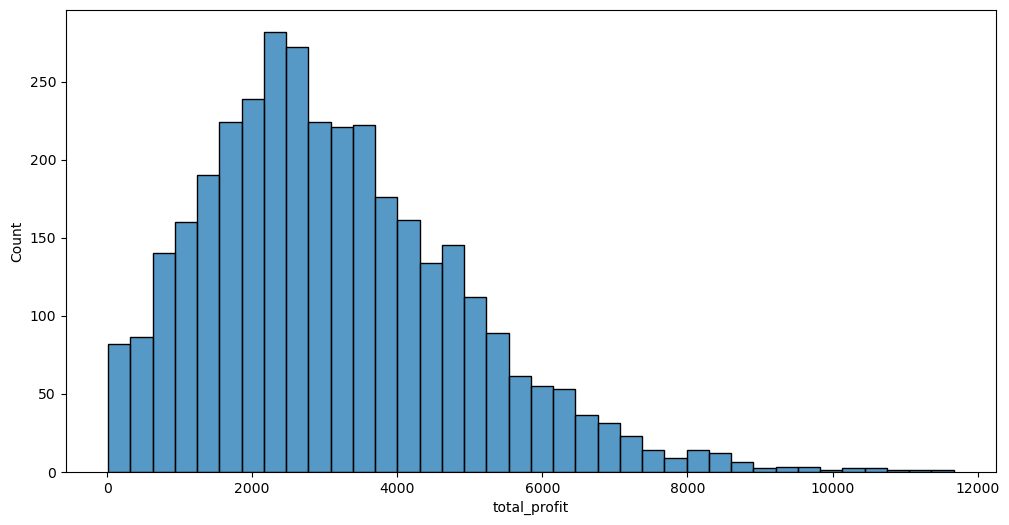

In [63]:
fig = plt.figure(figsize=(12,6))
ax = sns.histplot(data=total_profit_by_customer, x='total_profit')

A significant number of customers can generate a profit of approximately $2,500 each. Therefore, I have chosen to set the profit threshold at around $2,500

In [64]:

def cal_profit_proportion(purchase_fre, profit_customer, total_profit_by_customer):
    sum_total_profit = total_profit_by_customer['total_profit'].sum()
    sum_total_profit_fre = total_profit_by_customer[(total_profit_by_customer['total_profit']>=profit_customer)&(total_profit_by_customer['purchase_frequency']>=purchase_fre)]['total_profit'].sum()
    proportion_profit = round(sum_total_profit_fre / sum_total_profit, 4)
    print(f"When the threshold of purchase frequency is {purchase_fre} and the threshold of total profit generated by a single customer is {profit_customer},")
    print(f"all the customers who meet both reuqirements can generate {proportion_profit*100}% of all profit.")

In [65]:
cal_profit_proportion(purchase_fre=4, profit_customer=2300, total_profit_by_customer=final_data)

When the threshold of purchase frequency is 4 and the threshold of total profit generated by a single customer is 2300,
all the customers who meet both reuqirements can generate 88.39% of all profit.


In [66]:
# Step 1: Find the IDs of high-value customers
high_value_ids = final_data[(final_data['total_profit'] >= 2300) & (final_data['purchase_frequency'] >= 4)]['customer_id']

# Step 2: Create a new feature "target" to label high-value customers
final_data['target'] = np.where(final_data['customer_id'].isin(high_value_ids), 1, 0)

# Display the first few rows of the updated dataset with the "target" feature
final_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RFM_Segment,profit,total_profit,purchase_frequency,target
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,1953.15,3,0,0,3,"Low-Value, Most Engaged",17.87,645.99,3,0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,1953.15,3,0,0,3,"Low-Value, Most Engaged",448.68,645.99,3,0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,1953.15,3,0,0,3,"Low-Value, Most Engaged",179.44,645.99,3,0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,7351.70,1,2,2,5,"Medium-Value, Engaged",1702.55,4179.11,7,1
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,7351.70,1,2,2,5,"Medium-Value, Engaged",451.65,4179.11,7,1


In [67]:
final_data['target'].value_counts()

1    14577
0     5196
Name: target, dtype: int64

In [68]:
# Calculate the percentages of each target value
target_percentages = final_data['target'].value_counts(normalize=True) * 100

# Print the percentages
print(target_percentages)

1    73.721742
0    26.278258
Name: target, dtype: float64


In [69]:
# load packages for modelling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

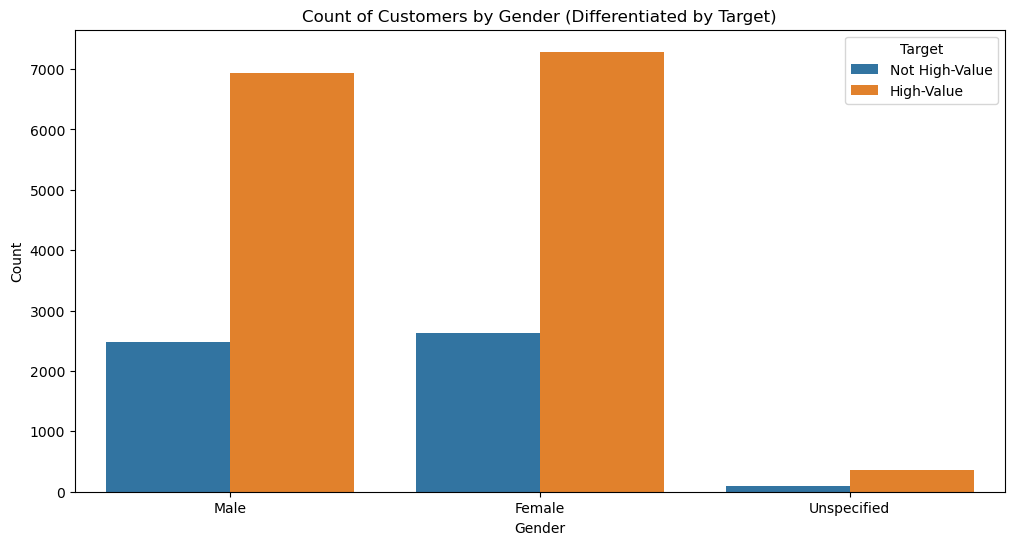

In [70]:
# Create a countplot for gender with differentiation by 'target'
plt.figure(figsize=(12, 6))
sns.countplot(data=final_data, x='gender', hue='target')

# Add labels and a title for the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Customers by Gender (Differentiated by Target)')

# Show the legend for the 'target' values
plt.legend(title='Target', labels=['Not High-Value', 'High-Value'])

# Display the plot
plt.show()

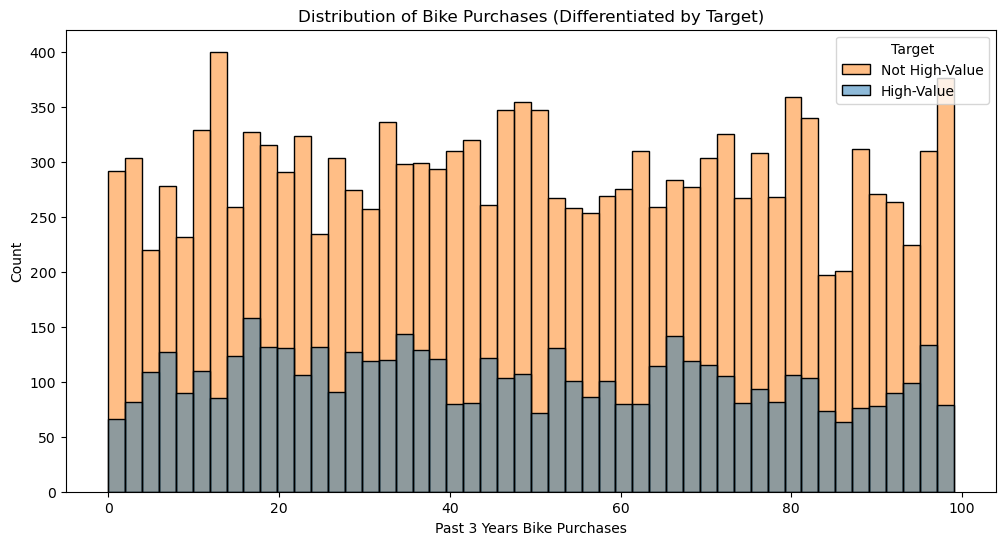

In [71]:
# Create a histogram for 'past_3_years_bike_related_purchases' with differentiation by 'target'
plt.figure(figsize=(12, 6))
sns.histplot(data=final_data, x='past_3_years_bike_related_purchases', hue='target', bins=50)

# Add labels and a title for the plot
plt.xlabel('Past 3 Years Bike Purchases')
plt.ylabel('Count')
plt.title('Distribution of Bike Purchases (Differentiated by Target)')

# Show the legend for the 'target' values
plt.legend(title='Target', labels=['Not High-Value', 'High-Value'])

# Display the plot
plt.show()

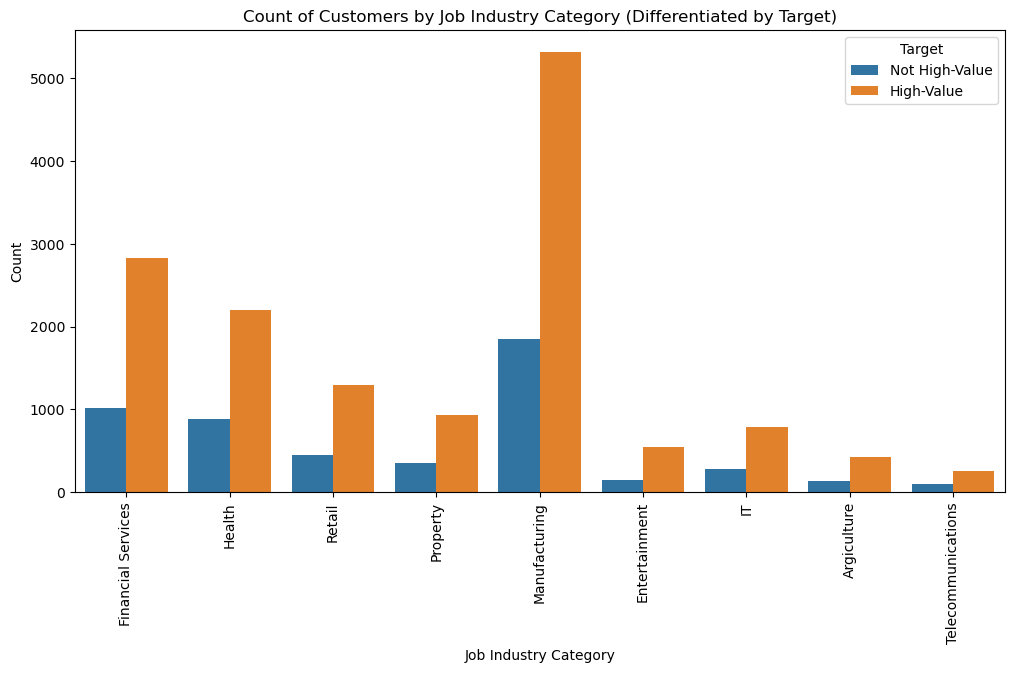

In [72]:
# Create a countplot for 'job_industry_category' with differentiation by 'target'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=final_data, x='job_industry_category', hue='target')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and a title for the plot
plt.xlabel('Job Industry Category')
plt.ylabel('Count')
plt.title('Count of Customers by Job Industry Category (Differentiated by Target)')

# Show the legend for the 'target' values
plt.legend(title='Target', labels=['Not High-Value', 'High-Value'])

# Display the plot
plt.show()

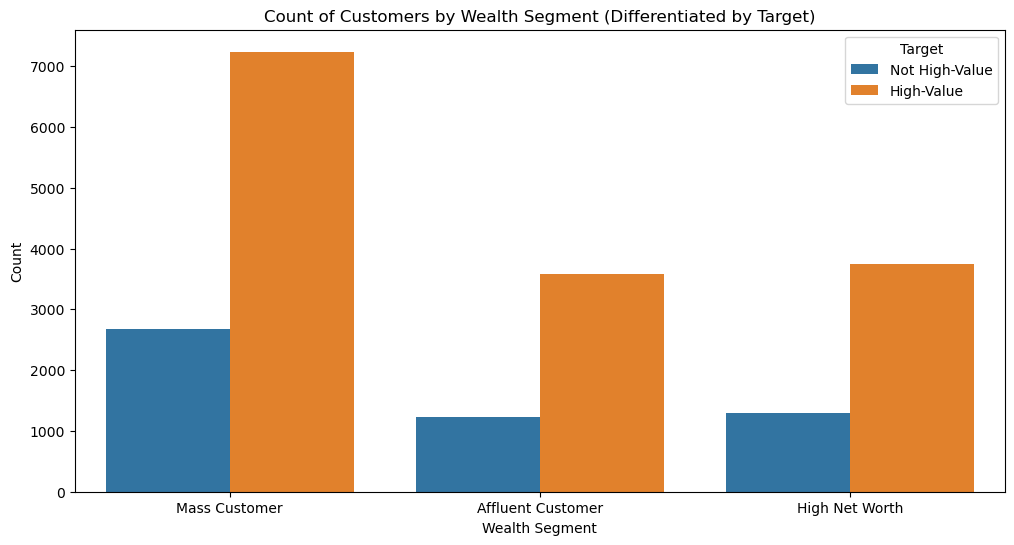

In [73]:
# Create a countplot for 'wealth_segment' with differentiation by 'target'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = final_data, x='wealth_segment', hue='target')

# Add labels and a title for the plot
plt.xlabel('Wealth Segment')
plt.ylabel('Count')
plt.title('Count of Customers by Wealth Segment (Differentiated by Target)')

# Show the legend for the 'target' values
plt.legend(title='Target', labels=['Not High-Value', 'High-Value'])

# Display the plot
plt.show()

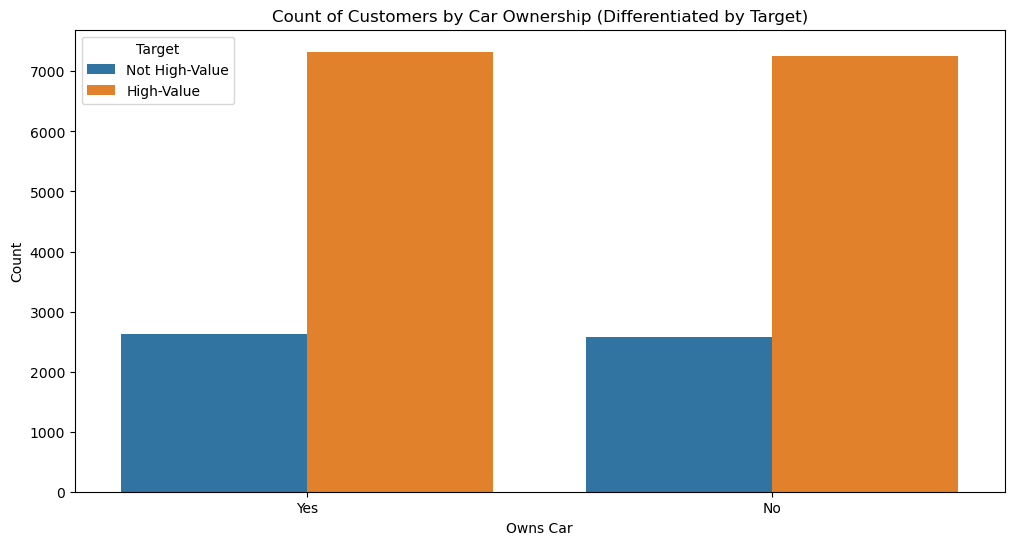

In [74]:
# Create a countplot for 'owns_car' with differentiation by 'target'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=final_data, x='owns_car', hue='target')

# Add labels and a title for the plot
plt.xlabel('Owns Car')
plt.ylabel('Count')
plt.title('Count of Customers by Car Ownership (Differentiated by Target)')

# Show the legend for the 'target' values
plt.legend(title='Target', labels=['Not High-Value', 'High-Value'])

# Display the plot
plt.show()

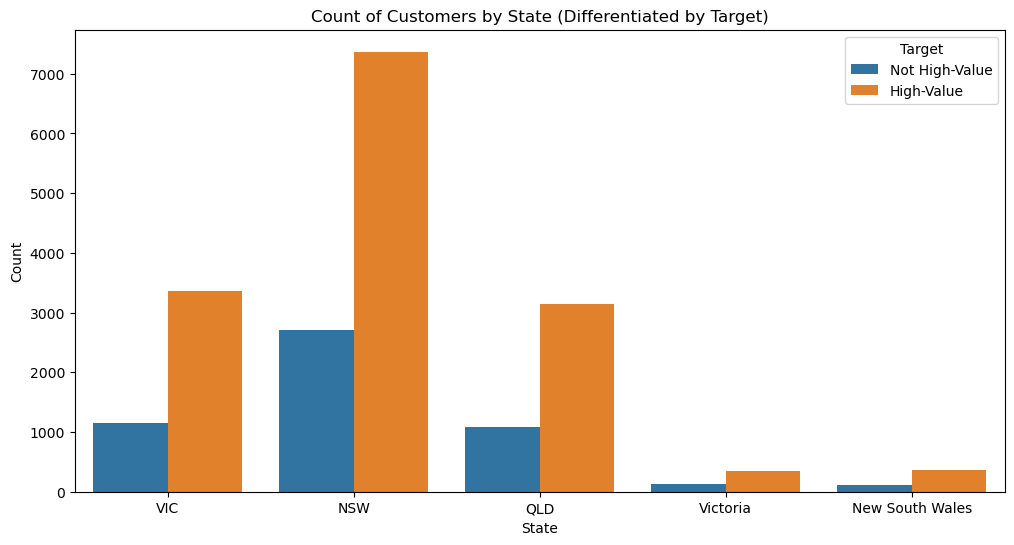

In [75]:
# Create a countplot for 'state' with differentiation by 'target'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=final_data, x='state', hue='target')

# Add labels and a title for the plot
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Customers by State (Differentiated by Target)')

# Show the legend for the 'target' values
plt.legend(title='Target', labels=['Not High-Value', 'High-Value'])

# Display the plot
plt.show()

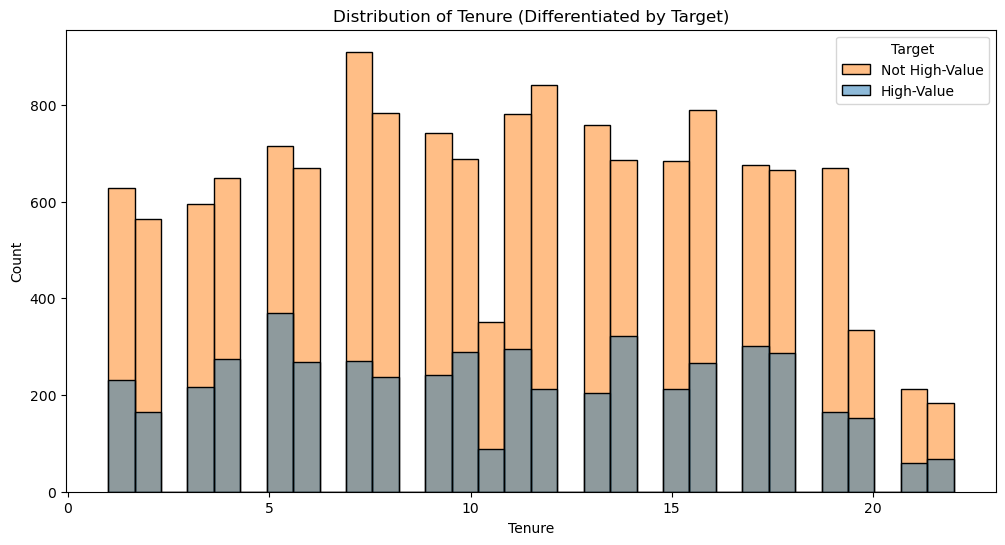

In [76]:
# Create a histogram for 'tenure' with differentiation by 'target'
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=final_data, x='tenure', hue='target')

# Add labels and a title for the plot
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Tenure (Differentiated by Target)')

# Show the legend for the 'target' values
plt.legend(title='Target', labels=['Not High-Value', 'High-Value'])

# Display the plot
plt.show()

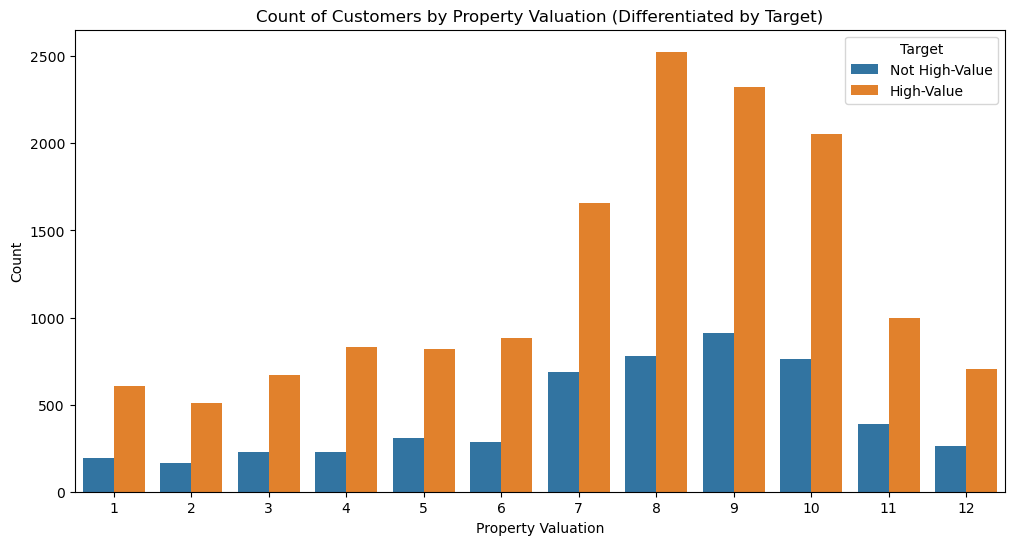

In [77]:
# Create a countplot for 'property_valuation' with differentiation by 'target'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=final_data, x='property_valuation', hue='target')

# Add labels and a title for the plot
plt.xlabel('Property Valuation')
plt.ylabel('Count')
plt.title('Count of Customers by Property Valuation (Differentiated by Target)')

# Show the legend for the 'target' values
plt.legend(title='Target', labels=['Not High-Value', 'High-Value'])

# Display the plot
plt.show()

The figures above show that for most of the demographic and behavioral features, the distributions of customers are quite similar between high-value and not high-value customer groups. This similarity in distributions makes it challenging to build a robust predictive model that can effectively differentiate between these two customer groups based on the selected features.

To create a more effective predictive model, it may be necessary to explore additional features or perform feature engineering to identify characteristics that better distinguish high-value customers from the rest.

In [78]:
# Create a new feature "age_group"
final_data['age_group'] = pd.cut(final_data['Age'], bins=[0, 30, 45, 60, 100], labels=['young adult', 'adult', 'old adult', 'elderly'])

# Drop the "Age" column
final_data = final_data.drop(columns=['Age'])

# Create another new feature "property_group"
final_data['property_group'] = 'medium'
final_data['property_group'] = np.where(final_data['property_valuation'] <= 6, 'low', final_data['property_group'])
final_data['property_group'] = np.where(final_data['property_valuation'] >= 11, 'low', final_data['property_group'])

# Drop the "property_valuation" column
final_data = final_data.drop(columns=['property_valuation'])

# Display the first few rows of the updated DataFrame
final_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Frequency_Score,Monetary_Score,RFM_Score,RFM_Segment,profit,total_profit,purchase_frequency,target,age_group,property_group
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,0,0,3,"Low-Value, Most Engaged",17.87,645.99,3,0,elderly,low
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,0,0,3,"Low-Value, Most Engaged",448.68,645.99,3,0,elderly,low
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,0,0,3,"Low-Value, Most Engaged",179.44,645.99,3,0,elderly,low
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,2,2,5,"Medium-Value, Engaged",1702.55,4179.11,7,1,adult,low
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,2,2,5,"Medium-Value, Engaged",451.65,4179.11,7,1,adult,low


In [79]:
# List of columns to one-hot encode
columns_to_encode = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'state', 'age_group', 'property_group']

# Apply one-hot encoding to the specified columns
final_data = pd.get_dummies(data=final_data, columns=columns_to_encode)

In [80]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19773 entries, 0 to 19772
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   transaction_id                            19773 non-null  int64         
 1   product_id                                19773 non-null  int64         
 2   customer_id                               19773 non-null  int64         
 3   transaction_date                          19773 non-null  datetime64[ns]
 4   online_order                              19773 non-null  float64       
 5   order_status                              19773 non-null  object        
 6   brand                                     19773 non-null  object        
 7   product_line                              19773 non-null  object        
 8   product_class                             19773 non-null  object        
 9   product_size                

In [81]:
selected_columns = [
    'past_3_years_bike_related_purchases', 'tenure', 'target',
    'gender_Female', 'gender_Male', 'gender_Unspecified',
    'job_industry_category_Argiculture', 'job_industry_category_Entertainment',
    'job_industry_category_Financial Services', 'job_industry_category_Health',
    'job_industry_category_IT', 'job_industry_category_Manufacturing',
    'job_industry_category_Property', 'job_industry_category_Retail',
    'job_industry_category_Telecommunications',
    'wealth_segment_Affluent Customer', 'wealth_segment_High Net Worth', 'wealth_segment_Mass Customer',
    'owns_car_No', 'owns_car_Yes',
    'state_NSW','state_New South Wales', 'state_QLD', 'state_VIC','state_Victoria',
    'age_group_young adult', 'age_group_adult', 'age_group_old adult', 'age_group_elderly',
    'property_group_low', 'property_group_medium'
]
selected_data = final_data[selected_columns]

### Scaling the Dataset

In [82]:
from sklearn.preprocessing import StandardScaler

# Drop the 'target' column to create the feature matrix (X)
X = selected_data.drop(columns=['target'])

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Extract the target variable (y)
y = selected_data['target']

# Display the shapes of the feature matrix and target variable
X_scaled.shape, y.shape

((19773, 30), (19773,))

In [83]:

pred_train_labels = np.zeros(shape=(X_scaled.shape[0], 2))   # Predicted training labels
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=29)
fold_counter = 1

for train_index, test_index in kfold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Build the logistic regression model
    model = LogisticRegression(random_state=51, C=1)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    pred_train_labels[test_index] = model.predict_proba(X_test)
    precision = precision_score(y_test, model.predict(X_test))
    recall = recall_score(y_test, model.predict(X_test))
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Fold {fold_counter} Precision {precision:.3f} Recall {recall:.3f} Accuracy {accuracy:.3f}")
    fold_counter += 1

# Calculate predicted labels
pred_y = pred_train_labels.argmax(axis=-1)
total_precision = precision_score(y, pred_y)
total_recall = recall_score(y, pred_y)
total_accuracy = accuracy_score(y, pred_y)

print(f"Total Precision {total_precision:.3f} Recall {total_recall:.3f} Accuracy {total_accuracy:.3f}")

Fold 1 Precision 0.737 Recall 1.000 Accuracy 0.737
Fold 2 Precision 0.737 Recall 1.000 Accuracy 0.737
Fold 3 Precision 0.737 Recall 1.000 Accuracy 0.737
Fold 4 Precision 0.737 Recall 1.000 Accuracy 0.737
Fold 5 Precision 0.737 Recall 1.000 Accuracy 0.737
Total Precision 0.737 Recall 1.000 Accuracy 0.737


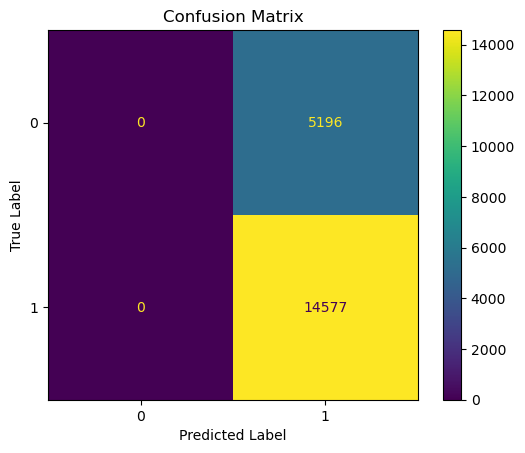

In [84]:
# Calculate the confusion matrix
cm = confusion_matrix(y, pred_y, labels=model.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()

# Set axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [85]:
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5196
           1       0.74      1.00      0.85     14577

    accuracy                           0.74     19773
   macro avg       0.37      0.50      0.42     19773
weighted avg       0.54      0.74      0.63     19773



In [86]:
pred_train_labels = np.zeros(shape=(X_scaled.shape[0], 2))   # pred training labels
# create cv dataset
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=29)
fold_counter = 1
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # build model
    model = RandomForestClassifier(random_state=56)
    # train model
    model.fit(X_train, y_train)
    pred_train_labels[test_index] = model.predict_proba(X_test)
    print(f"Fold {fold_counter} Precision {precision_score(y_test, model.predict(X_test)):.3f} Recall {recall_score(y_test, model.predict(X_test)):.3f} Accuracy {accuracy_score(y_test, model.predict(X_test)):.3f}")
    fold_counter = fold_counter + 1
# predicted labels
pred_y = pred_train_labels.argmax(axis=-1)
print(f"Total  Precision {precision_score(y, pred_y):.3f} Recall {recall_score(y, pred_y):.3f} Accuracy {accuracy_score(y, pred_y):.3f}")

Fold 1 Precision 0.992 Recall 1.000 Accuracy 0.994
Fold 2 Precision 0.989 Recall 1.000 Accuracy 0.992
Fold 3 Precision 0.989 Recall 1.000 Accuracy 0.992
Fold 4 Precision 0.989 Recall 1.000 Accuracy 0.992
Fold 5 Precision 0.986 Recall 1.000 Accuracy 0.990
Total  Precision 0.989 Recall 1.000 Accuracy 0.992


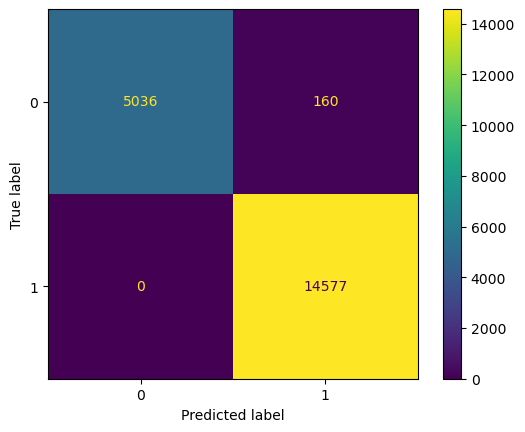

In [87]:
cm = confusion_matrix(y, pred_y, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [88]:
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5196
           1       0.99      1.00      0.99     14577

    accuracy                           0.99     19773
   macro avg       0.99      0.98      0.99     19773
weighted avg       0.99      0.99      0.99     19773



### RandomForestClassification Model

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target variable
X = selected_data.drop(columns=['target'])
y = selected_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [92]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9934260429835651
Confusion Matrix:
 [[1012   26]
 [   0 2917]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1038
           1       0.99      1.00      1.00      2917

    accuracy                           0.99      3955
   macro avg       1.00      0.99      0.99      3955
weighted avg       0.99      0.99      0.99      3955



The results of your model evaluation are very promising, indicating that the model is performing well on the test data. Here's how to interpret the results:

`Accuracy: `The accuracy of the model is 0.9934, which means it correctly classifies approximately 99.34% of the instances in the test data.

`Confusion Matrix:`

`True Positives (TP): 2917` - The number of instances that are actually in the positive class (1) and were correctly classified as positive by the model.

`True Negatives (TN): 1012` - The number of instances that are actually in the negative class (0) and were correctly classified as negative by the model.

`False Positives (FP): 26` - The number of instances that are actually in the negative class but were incorrectly classified as positive by the model.

`False Negatives (FN): 0` - The number of instances that are actually in the positive class but were incorrectly classified as negative by the model.
The confusion matrix shows that there are very few misclassifications. The model performs exceptionally well, with almost no false negatives and a very low number of false positives.

`Classification Report:`
Precision: The precision for class 0 is 1.00, and for class 1 is 0.99. This indicates that when the model predicts a customer as a high-value customer (class 1), it is correct 99% of the time. For class 0, it is correct 100% of the time.
Recall (Sensitivity): The recall for class 0 is 0.97, and for class 1 is 1.00. This shows that the model correctly identifies 97% of the actual negative class instances (class 0) and 100% of the actual positive class instances (class 1).
F1-Score: The F1-score is a balanced measure of precision and recall. For both classes, the F1-score is very high, indicating a good balance between precision and recall.
Support: The number of instances in each class in the test data.

In summary, our model has very high accuracy, precision, recall, and F1-score, which suggests that it is an excellent classifier. It performs exceptionally well in distinguishing between high-value customers (class 1) and non-high-value customers (class 0), with very few misclassifications. This is a highly reliable model for our classification task.

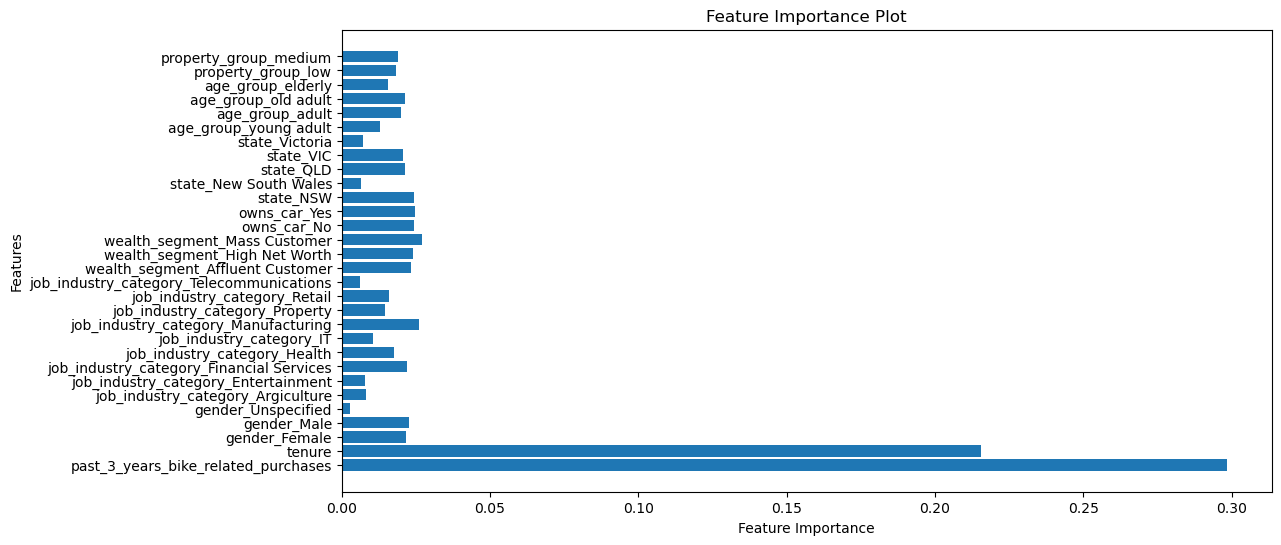

In [93]:
import matplotlib.pyplot as plt

# Plot feature importance
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()

Interpretation: Features with higher importance are considered more influential in making predictions. In your plot, you can see which features are the most important for the classification task.

The feature importance plot helps you understand which features are the key drivers behind your model's decisions. It can be valuable for feature selection, model interpretation, and even domain knowledge. If a feature has very low importance, it might be a candidate for removal, which can simplify the model without sacrificing predictive performance. ie purchases in the last threee years is the most important of all the attributes